In [122]:
import shapefile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas

In [123]:
sf = shapefile.Reader('CENTRELINE_WGS84.shp')
shapes = sf.shapes()
print shapes[0].points[:]
"""plt.figure()
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()"""

[(-8854882.888648126, 5401569.269090174), (-8854883.034235628, 5401568.303414544), (-8854882.53556869, 5401561.480886522), (-8854881.361656677, 5401555.065445907), (-8854879.196546681, 5401548.560634526), (-8854876.988162696, 5401543.565108681), (-8854872.28690554, 5401537.613659603), (-8854863.51755982, 5401528.9599522855), (-8854857.932058154, 5401524.353622895), (-8854750.345469128, 5401430.749939763), (-8854746.388428124, 5401426.7818293115), (-8854742.16492015, 5401422.032266596), (-8854740.09247672, 5401418.4186720755), (-8854738.739170255, 5401413.9926670855), (-8854737.744628513, 5401407.667131414), (-8854736.929162173, 5401398.540220861), (-8854736.242004097, 5401376.808189235), (-8854736.227071177, 5401349.066608375), (-8854736.400598917, 5401335.963506163), (-8854736.486162525, 5401328.462991764), (-8854736.432492763, 5401310.706493849), (-8854736.335871179, 5401300.225009201), (-8854736.332806984, 5401294.532588488), (-8854736.240676692, 5401289.83345222), (-8854736.5975390

'plt.figure()\nfor shape in sf.shapeRecords():\n    x = [i[0] for i in shape.shape.points[:]]\n    y = [i[1] for i in shape.shape.points[:]]\n    plt.plot(x,y)\nplt.show()'

In [124]:
"""#here we will look at the volumes data
#pedestrian = pandas.read_csv("volumes.csv")
streets = pandas.read_csv("stops.csv")
#lat = pedestrian['Latitude']
#lon = pedestrian['Longitude']
#streets[streets.latitude < 43.970797]
lat = streets['stop_lat']
lon = streets['stop_lon']
plt.figure()
plt.scatter(lat,lon)
plt.show()"""

'#here we will look at the volumes data\n#pedestrian = pandas.read_csv("volumes.csv")\nstreets = pandas.read_csv("stops.csv")\n#lat = pedestrian[\'Latitude\']\n#lon = pedestrian[\'Longitude\']\n#streets[streets.latitude < 43.970797]\nlat = streets[\'stop_lat\']\nlon = streets[\'stop_lon\']\nplt.figure()\nplt.scatter(lat,lon)\nplt.show()'

In [125]:
streets = pandas.read_csv("stop_times.csv")

In [126]:
ranking_routes = pandas.read_csv("ranking_routes2.csv",dtype={'ridership': np.float32, 'route_id': np.int})

In [127]:
routes = pandas.read_csv("routes.csv")

In [128]:
trips = pandas.read_csv("trips.csv",dtype={'route_id': np.int})

In [129]:
data = trips.groupby(['route_id'])['trip_id'].count().to_frame()
data.to_csv("data.csv")
data = pandas.read_csv("data.csv", dtype={ 'route_id': np.int})
data.columns = ['route_id','count_trips']

data.loc[data['route_id'] == 47565]

,route_id,count_trips
36,47565,13


In [130]:
result = pandas.concat([routes, ranking_routes], axis=1, join="inner")
result.loc[result['route_id'] == 47565]
result.to_csv("data1.csv")
result = pandas.read_csv("data1.csv", dtype={'route_id': np.int})
#result.drop('Unnamed:\n0')
result = result.drop(result.columns[0], axis=1)
result.loc[result['route_id'] == 47565]

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color,rank,route_number,route_name,ridership
39,47565,1,141,DOWNTOWN/MT PLEASANT EXPRESS,NaN,3,NaN,FF8000,FFFFFF,40,129,McCowan North,15222.0


In [131]:
passenger = pandas.concat([result, data], axis=1)
#passenger = passenger[['route_id','count_trips','ridership']]
#passenger.loc[passenger['route_id'] == 48646]
#passenger['ridership'] = passenger['ridership'].convert_objects(convert_numeric=True)
#passenger['per_route'] = passenger.ridership/passenger.count_trips
#passenger.sort_values(['per_route','count_trips','ridership'],ascending = False)

In [132]:
distance = streets.groupby(['trip_id'])['shape_dist_traveled'].max().to_frame()
distance.to_csv("distance.csv")
distance = pandas.read_csv("distance.csv")
trips.sort_values(['trip_id'],ascending = True)
distance.sort_values(['trip_id'],ascending = True)
#data = pandas.concat([trips, distance], axis=1, join_axes=[distance.trip_id],join="inner")
total_distance = trips.merge(distance, on="trip_id")

In [133]:
total_distance.head()

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,shape_dist_traveled
0,47526,1,32830005,LINE 1 (YONGE-UNIVERSITY),NaN,0,1424478,619622,1,30.2922
1,47526,1,32830006,LINE 1 (YONGE-UNIVERSITY),NaN,0,1424479,619622,1,30.2922
2,47526,1,32830007,LINE 1 (YONGE-UNIVERSITY),NaN,0,1424480,619622,1,30.2922
3,47526,1,32830008,LINE 1 (YONGE-UNIVERSITY),NaN,0,1424481,619622,1,30.2922
4,47526,1,32830009,LINE 1 (YONGE-UNIVERSITY),NaN,0,1424482,619622,1,30.2922


In [134]:
ranking_routes.columns = ['rank','route_short_name','route_name','ridership']
ranking_routes.sort_values(['route_short_name'],ascending = True)
routes.sort_values(['route_short_name'],ascending = True)
ranking_routes['route_short_name'] = ranking_routes['route_short_name'].astype('str')
#routes.as_int('route_short_name')
#routes.apply(lambda x: pandas.to_numeric(x, errors='ignore'))
routes_ranked = ranking_routes.merge(routes, on="route_short_name")
routes_ranked.head()

,rank,route_short_name,route_name,ridership,route_id,agency_id,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
0,1,504,King,64579.0,47664,1,KING,NaN,0,NaN,008000,FFFFFF
1,2,32,Eglinton West,48684.0,47618,1,EGLINTON WEST,NaN,3,NaN,0000FF,FFFFFF
2,3,35,Jane,45699.0,47634,1,JANE,NaN,3,NaN,FF0000,FFFFFF
3,4,36,Finch West,43952.0,47638,1,FINCH WEST,NaN,3,NaN,808000,FFFFFF
4,5,510,Spadina,43804.0,47670,1,SPADINA,NaN,0,NaN,FF8000,FFFFFF


In [135]:
distance_routes = routes_ranked.merge(total_distance, on="route_id")
distance_routes['route_type'][distance_routes['route_type']  == 0] = "0.03526"
distance_routes['route_type'][distance_routes['route_type']  == 1] = "0.01211"
distance_routes['route_type'][distance_routes['route_type']  == 3] = "0.08781"
#distance_routes['route_type_vals'] = distance_routes.Set.map( lambda x: '0.03526' if x == 0) 
#distance_routes['route_type_vals'] = [for x in distance_routes['route_type'] '0.01211' if x == '1' ]
#distance_routes#elif '0.03526' if x == '0' else '0.08781' 

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [136]:
distance_routes['total_emmision'] = distance_routes['route_type'].astype('float') * distance_routes['ridership'] *  distance_routes['shape_dist_traveled']
distance_routes.head()

,rank,route_short_name,route_name,ridership,route_id,agency_id,route_long_name,route_desc,route_type,route_url,...,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,shape_dist_traveled,total_emmision
0,1,504,King,64579.0,47664,1,KING,NaN,0.03526,NaN,...,1,32864758,EAST - 504 KING TOWARDS BROADVIEW STATION VIA ...,NaN,0,1426300,621657,2,2.2598,5145.690109
1,1,504,King,64579.0,47664,1,KING,NaN,0.03526,NaN,...,1,32864702,EAST - 504 KING TOWARDS BROADVIEW STATION VIA ...,NaN,0,1426295,621652,2,12.8947,29361.948072
2,1,504,King,64579.0,47664,1,KING,NaN,0.03526,NaN,...,1,32864759,EAST - 504 KING TOWARDS BROADVIEW STATION VIA ...,NaN,0,1426296,621657,2,2.2598,5145.690109
3,1,504,King,64579.0,47664,1,KING,NaN,0.03526,NaN,...,1,32864701,EAST - 504 KING TOWARDS BROADVIEW STATION VIA ...,NaN,0,1426294,621652,2,12.8947,29361.948072
4,1,504,King,64579.0,47664,1,KING,NaN,0.03526,NaN,...,1,32864707,EAST - 504 KING TOWARDS BROADVIEW STATION VIA ...,NaN,0,1426299,621652,2,12.8947,29361.948072


In [137]:
distance_routes.to_csv("distance_routes_tiny1.csv")

In [138]:
small_distance_routes = distance_routes.drop(['agency_id','route_desc','rank','route_long_name','route_name','route_url','trip_headsign','trip_short_name','direction_id','block_id','shape_id','route_text_color','route_text_color','route_color'],1)
selected_route = small_distance_routes[small_distance_routes.route_short_name == "503"]
selected_route

,route_short_name,ridership,route_id,route_type,service_id,trip_id,wheelchair_accessible,shape_dist_traveled,total_emmision
116457,503,2214.0,47663,0.08781,1,32858591,1,3.1330,609.090728
116458,503,2214.0,47663,0.08781,1,32858592,1,3.1330,609.090728
116459,503,2214.0,47663,0.08781,1,32858593,1,3.1330,609.090728
116460,503,2214.0,47663,0.08781,1,32858594,1,3.1330,609.090728
116461,503,2214.0,47663,0.08781,1,32858595,1,3.1330,609.090728
116462,503,2214.0,47663,0.08781,1,32858567,1,9.4578,1838.703571
116463,503,2214.0,47663,0.08781,1,32858596,1,3.1330,609.090728
116464,503,2214.0,47663,0.08781,1,32858568,1,9.4578,1838.703571
116465,503,2214.0,47663,0.08781,1,32858597,1,3.1330,609.090728
116466,503,2214.0,47663,0.08781,1,32858569,1,9.4578,1838.703571


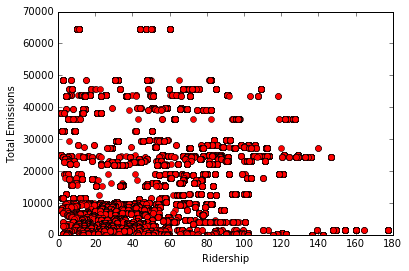

In [139]:
plt.plot ( 4.65 * distance_routes ['shape_dist_traveled'] ,distance_routes['ridership'] ,'ro')

"""plt.plot([0,5], 'ro')#[0,distance_routes['total_emmision'].astype(float)/distance_routes['shape_dist_traveled'].astype(float)])
plt.axis([4,2])#0, distance_routes['ridership'].astype(float)])
plt.show()     """     
          
#plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0, 180, 0, 70000])
plt.xlabel('Ridership')
plt.ylabel('Total Emissions')

plt.show()


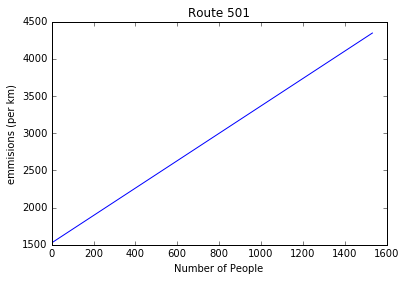

43464.0

In [140]:
selected_route = small_distance_routes[small_distance_routes.route_short_name == "501"]
selected_route = selected_route.iloc[0]
b = (selected_route['total_emmision']/selected_route['shape_dist_traveled']) - 4.65

plt.plot([1,selected_route['total_emmision']/selected_route['shape_dist_traveled']],[b, selected_route['ridership'].astype(float)/10])
plt.ylabel('emmisions (per km)')
plt.xlabel('Number of People')
plt.title('Route 501')
plt.show()


selected_route['ridership']

In [141]:
perc = pandas.read_csv("perc_per_ride.csv")
perc_under_ten = perc
x = perc_under_ten[perc_under_ten.perc_of_cap.astype(float) < 0.09]
x = x.sort_values(['perc_of_cap'],ascending = True)
x
y = x.merge(small_distance_routes, on="route_id")
tot_emmisions = y['total_emmision'].sum()
tot_emmisions = tot_emmisions/1000
#here we cut the frequency of buses in half
tot_emmisions = tot_emmisions/2
percent = tot_emmisions/320000
percent*100
y.count()

rank                     14129
route_number             14129
route_name               14129
ridership_x              14129
route_id                 14129
trips                    14129
riders per trip          14129
route_type_x             14129
max_capacity             14129
perc_of_cap              14129
route_short_name         14129
ridership_y              14129
route_type_y             14129
service_id               14129
trip_id                  14129
wheelchair_accessible    14129
shape_dist_traveled      14129
total_emmision           14129
dtype: int64